<a href="https://colab.research.google.com/github/sadafyousuf/Spoon-Knife/blob/master/Concrete_Strength_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error as mae
 
 
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving concrete_strength.csv to concrete_strength (1).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['concrete_strength.csv']))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


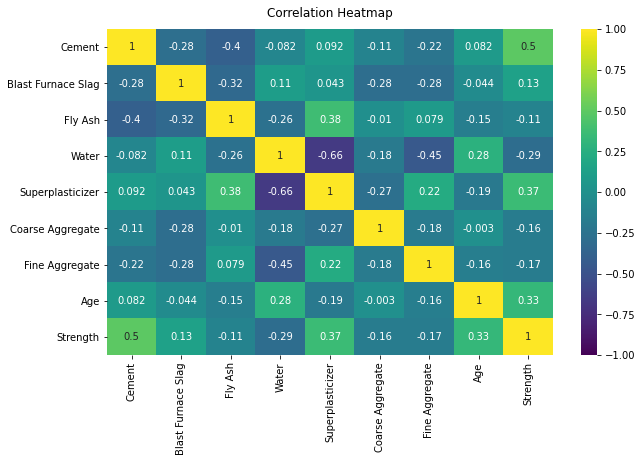

In [ ]:
plt.figure(figsize=(10,6))

heatmap = sns.heatmap(df.corr(), vmin=-1,vmax=1, annot=True, cmap='viridis')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

In [ ]:
# Feature And Target Set
pred = df[df.columns[df.columns!="Strength"]].values
targ = df["Strength"]

In [ ]:
pred.shape

(1030, 8)

In [ ]:
targ.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [ ]:
# Normalization
pred_normal = ((pred - pred.mean())/pred.std())
pred_normal

array([[ 0.68491213, -0.84750875, -0.84750875, ...,  2.10382035,
         1.07085517, -0.76804989],
       [ 0.68491213, -0.84750875, -0.84750875, ...,  2.1463876 ,
         1.07085517, -0.76804989],
       [ 0.09606522, -0.44311991, -0.84750875, ...,  1.79733617,
         0.83815422, -0.08129831],
       ...,
       [-0.42609301, -0.45191714, -0.53932188, ...,  1.68495864,
         1.36598808, -0.76804989],
       [-0.39601215, -0.31768842, -0.84750875, ...,  1.9607944 ,
         1.39124464, -0.76804989],
       [-0.10712244, -0.5623082 , -0.62530772, ...,  1.60578356,
         1.31348847, -0.76804989]])

In [ ]:
# Data Splitting
X_train, X_test, Y_train, Y_test = train_test_split(pred_normal, targ, test_size=0.1, shuffle=True, random_state=42)

In [ ]:
X_train.shape

(927, 8)

In [ ]:
n_cols = pred_normal.shape[1]

In [ ]:
# Linear Regression Model- Neural Network
def regression_model():
    model = Sequential()
    model.add(Dense(50,activation = "relu",input_shape = (n_cols,)))
    model.add(Dense(50,activation ="relu"))
    model.add(Dense(1,activation ="relu"))
    model.compile(loss='mae',
           optimizer='adam',
           metrics = 'mae'
                 )
    
    return model

In [ ]:
model = regression_model()
model.fit(X_train,Y_train,validation_split = 0.3, epochs = 100, verbose = 1)

Epoch 1/100
21/21 [==============================] - 1s 21ms/step - loss: 35.3315 - mae: 35.3315 - val_loss: 34.3661 - val_mae: 34.3661
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 34.3106 - mae: 34.3106 - val_loss: 32.4086 - val_mae: 32.4086
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 32.7373 - mae: 32.7373 - val_loss: 28.4865 - val_mae: 28.4865
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 27.1480 - mae: 27.1480 - val_loss: 22.0758 - val_mae: 22.0758
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 20.9855 - mae: 20.9855 - val_loss: 15.5511 - val_mae: 15.5511
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 16.5336 - mae: 16.5336 - val_loss: 13.2469 - val_mae: 13.2469
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 14.3738 - mae: 14.3738 - val_loss: 13.1629 - val_mae: 13.1629
Epoch 8/100
21/21 [==============================] - 0

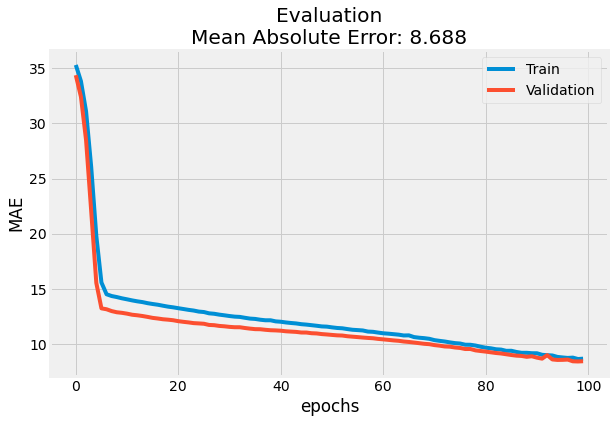

In [ ]:
plt.figure(figsize=(10,6))
with plt.style.context('fivethirtyeight'):

    sns.lineplot(x=np.arange(0,len(model.history.history['mae'])),y=model.history.history['mae'])
    sns.lineplot(x=np.arange(0,len(model.history.history['mae'])),y=model.history.history['val_mae'])

    plt.legend(['Train','Validation'], loc='upper right')
    plt.xlabel('epochs')
    plt.ylabel('MAE')
    plt.title('Evaluation\nMean Absolute Error: {:.3f}'.format(model.history.history['mae'][-1]))

plt.show()

In [ ]:
# Testing
Y_pred = model.predict(X_test)

In [ ]:
Y_pred = Y_pred.reshape(Y_pred.shape[0])

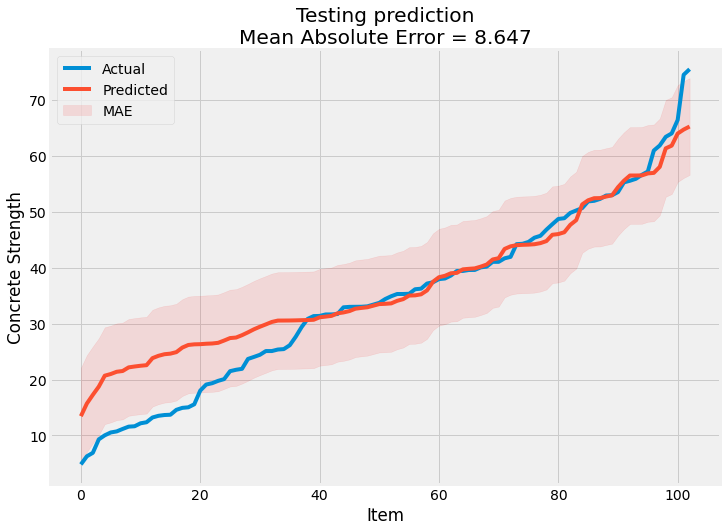

In [ ]:
MAE = mae(Y_test,Y_pred)

plt.figure(figsize=(12,8))
with plt.style.context('fivethirtyeight'):

    plt.plot(sorted(Y_test), label='Actual')
    plt.plot(sorted(Y_pred), label='Predicted')
    plt.fill_between(x=np.arange(0,len(Y_pred)),y1=sorted(Y_pred)+MAE,y2=sorted(Y_pred)-MAE, 
                     alpha=0.1, color='r', label='MAE')

    plt.title('Testing prediction\nMean Absolute Error = {:.3f}'.format(MAE))
    plt.ylabel('Concrete Strength')
    plt.xlabel('Item')
    plt.legend()
plt.show()

In [ ]:
# Neural Network Regression model
# Architecture : Bottleneck RNA

def bottle_neck_model():
    model = Sequential()
    model.add(Dense(300,activation = "relu",input_shape = (n_cols,)))
    model.add(Dense(150,activation ="relu"))
    model.add(Dense(50,activation ="relu"))
    model.add(Dense(150,activation ="relu"))
    model.add(Dense(300,activation ="relu"))
    model.add(Dense(1))
    model.compile(loss='mae',
           optimizer='adam',
           metrics = 'mae'
                 )
    return model
    

In [ ]:
model2 = bottle_neck_model()
model2.fit(X_train,Y_train,validation_split = 0.3, epochs = 100, verbose = 1)

Epoch 1/100
21/21 [==============================] - 1s 16ms/step - loss: 33.1913 - mae: 33.1913 - val_loss: 13.4260 - val_mae: 13.4260
Epoch 2/100
21/21 [==============================] - 0s 7ms/step - loss: 15.1479 - mae: 15.1479 - val_loss: 13.4697 - val_mae: 13.4697
Epoch 3/100
21/21 [==============================] - 0s 6ms/step - loss: 14.0018 - mae: 14.0018 - val_loss: 12.7772 - val_mae: 12.7772
Epoch 4/100
21/21 [==============================] - 0s 7ms/step - loss: 13.0468 - mae: 13.0468 - val_loss: 11.7520 - val_mae: 11.7520
Epoch 5/100
21/21 [==============================] - 0s 7ms/step - loss: 12.8123 - mae: 12.8123 - val_loss: 11.5709 - val_mae: 11.5709
Epoch 6/100
21/21 [==============================] - 0s 7ms/step - loss: 12.7222 - mae: 12.7222 - val_loss: 11.2193 - val_mae: 11.2193
Epoch 7/100
21/21 [==============================] - 0s 7ms/step - loss: 11.6322 - mae: 11.6322 - val_loss: 10.9318 - val_mae: 10.9318
Epoch 8/100
21/21 [==============================] - 0

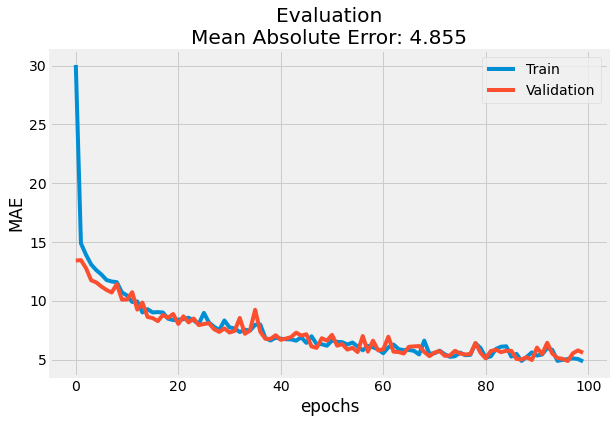

In [ ]:
plt.figure(figsize=(10,6))
with plt.style.context('fivethirtyeight'):

    sns.lineplot(x=np.arange(0,len(model2.history.history['mae'])),y=model2.history.history['mae'])
    sns.lineplot(x=np.arange(0,len(model2.history.history['mae'])),y=model2.history.history['val_mae'])

    plt.legend(['Train','Validation'], loc='upper right')
    plt.xlabel('epochs')
    plt.ylabel('MAE')
    plt.title('Evaluation\nMean Absolute Error: {:.3f}'.format(model2.history.history['mae'][-1]))

plt.show()

In [ ]:
# Testing
Y_pred = model2.predict(X_test)
Y_pred = Y_pred.reshape(Y_pred.shape[0])

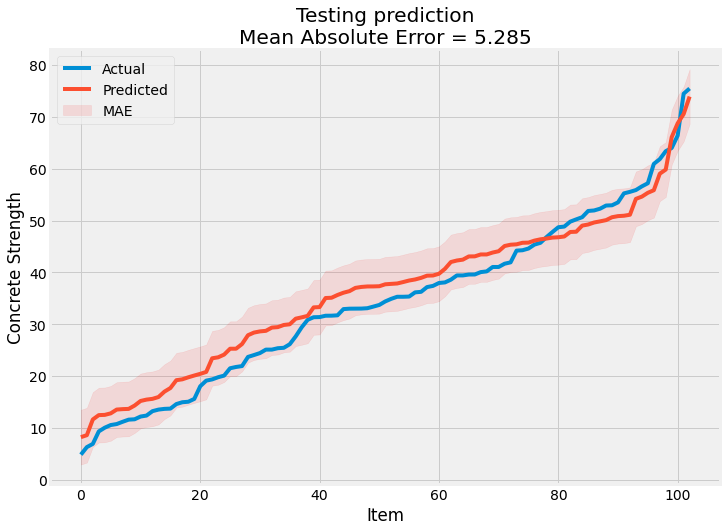

In [ ]:
MAE = mae(Y_test,Y_pred)

plt.figure(figsize=(12,8))
with plt.style.context('fivethirtyeight'):

    plt.plot(sorted(Y_test), label='Actual')
    plt.plot(sorted(Y_pred), label='Predicted')
    plt.fill_between(x=np.arange(0,len(Y_pred)),y1=sorted(Y_pred)+MAE,y2=sorted(Y_pred)-MAE, 
                     alpha=0.1, color='r', label='MAE')

    plt.title('Testing prediction\nMean Absolute Error = {:.3f}'.format(MAE))
    plt.ylabel('Concrete Strength')
    plt.xlabel('Item')
    plt.legend()
plt.show()